In [1]:
# 📌 Step 0: Install Required Packages
!pip install llama-index ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git
!pip install torch torchvision
!pip install matplotlib scikit-image
!pip install -U qdrant-client
!pip install unstructured pdf2image Pillow

# 📌 Step 1: Set up Paths and Environment
import os
from pathlib import Path

pdf_path = "/content/6._price_trends.pdf"
image_folder = Path("/content/pdf_images")
image_folder.mkdir(parents=True, exist_ok=True)

# Set your OpenAI key
os.environ["OPENAI_API_KEY"] = "sk...."


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.2/304.2 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 9.4 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-9pafhovr
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-9pafhovr
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install pdfminer.six
!pip install unstructured[pdf]
!apt-get install -y poppler-utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.9/527.9 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.0 MB/s eta 0:00:00


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 186 kB in 0s (388 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.8_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.8) ...
Setting up poppler-utils (22.02.0-2ubuntu0.8) ...
Processing triggers for man-db (2.10.2-1) ...


In [3]:
from unstructured.partition.pdf import partition_pdf

# Load all elements (text, tables, images)
chunks = partition_pdf(
    filename=pdf_path,
    extract_images_in_pdf=True,
    infer_table_structure=True,
    chunking_strategy="by_title",
)
#CREATES FIGURES AND PDF_IMAGES FOLDER

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [4]:
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.TableChunk'>"}

In [5]:
from PIL import Image

image_metadata_dict = {}
image_uuid = 0

for el in chunks:
    if "Image" in str(type(el)):
        image_uuid += 1
        img = el.image.convert("RGB")
        img_path = image_folder / f"{image_uuid}.jpg"
        img.save(img_path)

        image_metadata_dict[image_uuid] = {
            "filename": f"{image_uuid}.jpg",
            "img_path": str(img_path)
        }


In [6]:
from llama_index.core.schema import Document
import os

documents = []

# ✅ Add text chunks
for el in chunks:
    if hasattr(el, "text") and el.text and el.text.strip():
        documents.append(Document(text=el.text.strip()))
        print(f"Added text chunk of length {len(el.text)}")

Added text chunk of length 23
Added text chunk of length 494
Added text chunk of length 104
Added text chunk of length 491
Added text chunk of length 350
Added text chunk of length 458
Added text chunk of length 490
Added text chunk of length 138
Added text chunk of length 246
Added text chunk of length 448
Added text chunk of length 193
Added text chunk of length 500
Added text chunk of length 499
Added text chunk of length 13
Added text chunk of length 403
Added text chunk of length 493
Added text chunk of length 297
Added text chunk of length 355
Added text chunk of length 479
Added text chunk of length 434
Added text chunk of length 499
Added text chunk of length 121
Added text chunk of length 126
Added text chunk of length 435
Added text chunk of length 420
Added text chunk of length 464
Added text chunk of length 67
Added text chunk of length 112
Added text chunk of length 495
Added text chunk of length 414
Added text chunk of length 139
Added text chunk of length 430
Added text 

📂 Scanning directory: ./figures
✅ Added image doc: ./figures/figure-3-1.jpg | MIME: image/jpeg
✅ Added image doc: ./figures/figure-8-2.jpg | MIME: image/jpeg

🎉 Total figure documents added: 2

🖼️ Previewing up the figure images...



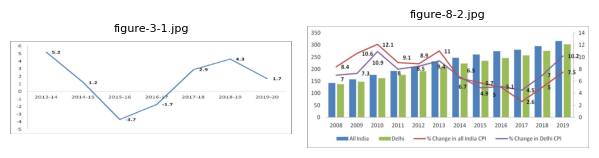

In [7]:
#convert image into document format- for generating CLIP embeddings
import os
from PIL import Image
import matplotlib.pyplot as plt
from llama_index.core.schema import Document

documents = []
figures_dir = "./figures"

print(f"📂 Scanning directory: {figures_dir}")
if not os.path.exists(figures_dir):
    raise FileNotFoundError(f"❌ Directory not found: {figures_dir}")

count = 0
preview_images = []

for filename in os.listdir(figures_dir):
    if filename.lower().endswith((".jpg", ".png")):
        file_path = os.path.join(figures_dir, filename)

        if not os.path.isfile(file_path):
            print(f"⚠️ Skipped (not a file): {file_path}")
            continue

        mime_type = "image/jpeg" if filename.endswith(".jpg") else "image/png"

        doc = Document(
            text="",
            metadata={
                "file_path": file_path,
                "mime_type": mime_type
            }
        )
        documents.append(doc)
        count += 1

        print(f"✅ Added image doc: {file_path} | MIME: {mime_type}")
        preview_images.append(file_path)

print(f"\n🎉 Total figure documents added: {count}")

# 📸 Optional Preview of First 5 Images
print("\n🖼️ Previewing up the figure images...\n")
plt.figure(figsize=(15, 5))
for i, img_path in enumerate(preview_images[:5]):
    try:
        image = Image.open(img_path).convert("RGB")
        plt.subplot(1, 5, i + 1)
        plt.imshow(image)
        plt.title(os.path.basename(img_path), fontsize=8)
        plt.axis("off")
    except Exception as e:
        print(f"❌ Error displaying {img_path}: {e}")
plt.tight_layout()
plt.show()


In [8]:
!pip install llama-index-vector-stores-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 4.8 MB/s eta 0

In [9]:
!pip install llama-index-vector-stores-qdrant

In [10]:
from qdrant_client import QdrantClient
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import StorageContext

In [11]:
from IPython import get_ipython # Import get_ipython to check if the client exists

# Check if a client already exists and close it
ipython = get_ipython()
if 'client' in ipython.user_ns and isinstance(ipython.user_ns['client'], QdrantClient):
    print("Closing existing Qdrant client...")
    ipython.user_ns['client'].close()
    # Optionally remove the variable to be sure
    del ipython.user_ns['client']

In [12]:
!pip install ftfy regex tqdm

In [13]:
import clip
import torch
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 86.0MiB/s]


In [14]:
#Extract CLIP image embeddings
import os
import numpy as np
from tqdm import tqdm

image_embeddings = []
metadata_list = []

figures_dir = "./figures"

for fname in tqdm(os.listdir(figures_dir)):
    if fname.endswith(".jpg") or fname.endswith(".png"):
        path = os.path.join(figures_dir, fname)
        image = preprocess(Image.open(path)).unsqueeze(0).to(device)
        with torch.no_grad():
          #generate embeddings for image
            embedding = model.encode_image(image).cpu().numpy()[0]

        image_embeddings.append(embedding)
        metadata_list.append({
            "file_path": path,
            "type": "figure",
            "filename": fname
        })


100%|██████████| 2/2 [00:01<00:00,  1.99it/s]


In [15]:
#Extract CLIP text embeddings
text_embeddings = []
text_metadata = []

for el in chunks:
    if hasattr(el, "text") and el.text.strip():
        txt = el.text.strip()
        # Tokenize the text, allowing truncation
        text = clip.tokenize([txt], truncate=True).to(device)
        with torch.no_grad():
          #generate embeddings
            embedding = model.encode_text(text).cpu().numpy()[0]

        text_embeddings.append(embedding)
        text_metadata.append({
            "text": txt,
            "type": "text"
        })

In [16]:
#debugging for proper embedding generation
print(f"[🔍] Total image embeddings: {len(image_embeddings)}")
print(f"[🔍] Total text embeddings: {len(text_embeddings)}")

print("[🧠] First image embedding (vector):")
print(image_embeddings[0][:10])  # show first 10 dimensions

print("[🧠] First text embedding (vector):")
print(text_embeddings[0][:10])   # show first 10 dimensions

print("[ℹ️] Image vector shape:", image_embeddings[0].shape)
print("[ℹ️] Text vector shape:", text_embeddings[0].shape)

print("[ℹ️] Type:", type(image_embeddings[0]))


[🔍] Total image embeddings: 2
[🔍] Total text embeddings: 59
[🧠] First image embedding (vector):
[ 0.17177887 -0.6168391  -0.26838225  0.06244282 -0.00509721 -0.5191522
  0.05990908  1.0516454   0.27878392 -0.06867255]
[🧠] First text embedding (vector):
[-0.43019614 -0.14182688 -0.26978394 -0.12105404  0.20017342 -0.40382746
 -0.07506482 -0.5826201   0.33231074  0.05819591]
[ℹ️] Image vector shape: (512,)
[ℹ️] Text vector shape: (512,)
[ℹ️] Type: <class 'numpy.ndarray'>


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


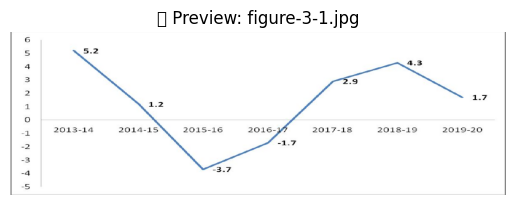

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

# Preview one image from your figures folder
img_path = metadata_list[0]['file_path']
img = Image.open(img_path)

plt.imshow(img)
plt.axis("off")
plt.title("📊 Preview: " + os.path.basename(img_path))
plt.show()


In [18]:
#creating vector qdrantdb
from qdrant_client import QdrantClient
from qdrant_client.models import Distance, VectorParams, PointStruct

# Use local persistent DB (stored at ./qdrant_clip_db)
client = QdrantClient(path="./qdrant_clip_db")


In [19]:
# Create a collection to store figure image vectors
client.recreate_collection(
    collection_name="clip_figures",
    vectors_config=VectorParams(size=512, distance=Distance.COSINE),
)

# Create a collection to store text chunk vectors
client.recreate_collection(
    collection_name="clip_texts",
    vectors_config=VectorParams(size=512, distance=Distance.COSINE),
)


<ipython-input-19-4022418595>:2: DeprecationWarning: `recreate_collection` method is deprecated and will be removed in the future. Use `collection_exists` to check collection existence and `create_collection` instead.
  client.recreate_collection(
<ipython-input-19-4022418595>:8: DeprecationWarning: `recreate_collection` method is deprecated and will be removed in the future. Use `collection_exists` to check collection existence and `create_collection` instead.
  client.recreate_collection(


True

In [20]:
# Upload figure image embeddings to Qdrant
client.upsert(
    collection_name="clip_figures",
    points=[
        PointStruct(id=i, vector=vec, payload=meta)
        for i, (vec, meta) in enumerate(zip(image_embeddings, metadata_list))
    ]
)

# Upload text embeddings to Qdrant
client.upsert(
    collection_name="clip_texts",
    points=[
        PointStruct(id=i, vector=vec, payload=meta)
        for i, (vec, meta) in enumerate(zip(text_embeddings, text_metadata))
    ]
)

UpdateResult(operation_id=0, status=<UpdateStatus.COMPLETED: 'completed'>)

In [21]:
#DEBUGGING
print("[📦] Qdrant clip_figures count:",
      client.count(collection_name="clip_figures").count)

print("[📦] Qdrant clip_texts count:",
      client.count(collection_name="clip_texts").count)


[📦] Qdrant clip_figures count: 2
[📦] Qdrant clip_texts count: 59


In [22]:
#text-to-image retrieval
query = "Show graphs"
tokenized = clip.tokenize([query]).to(device)

with torch.no_grad():
    q_vector = model.encode_text(tokenized).cpu().numpy()[0]

results = client.search(
    collection_name="clip_figures",
    query_vector=q_vector,
    limit=3
)

for r in results:
    print(f"[📥] Score: {r.score:.4f}, Path: {r.payload['file_path']}")


[📥] Score: 0.2706, Path: ./figures/figure-3-1.jpg
[📥] Score: 0.2284, Path: ./figures/figure-8-2.jpg


<ipython-input-22-1810165760>:8: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  results = client.search(


In [23]:
img = preprocess(Image.open(metadata_list[0]["file_path"])).unsqueeze(0).to(device)

with torch.no_grad():
    q_vector = model.encode_image(img).cpu().numpy()[0]

results = client.search(
    collection_name="clip_texts",
    query_vector=q_vector,
    limit=3
)

for r in results:
    print(f"[📄] Score: {r.score:.4f}, Text: {r.payload['text'][:100]}")


[📄] Score: 0.3392, Text: ECONOMIC SURVEY OF DELHI, 2020-21 95

conventionally used as an indicator to measure the rate of inf
[📄] Score: 0.3284, Text: The National Statistical Office (NSO), Ministry of Statistics and Programme Implementation is releas
[📄] Score: 0.3144, Text: ECONOMIC SURVEY OF DELHI, 2020-21 94

level. WPI is the primary measure used for ascertaining inflat


<ipython-input-23-4249484973>:6: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  results = client.search(


<ipython-input-24-795280219>:32: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  image_search_results = client.search(


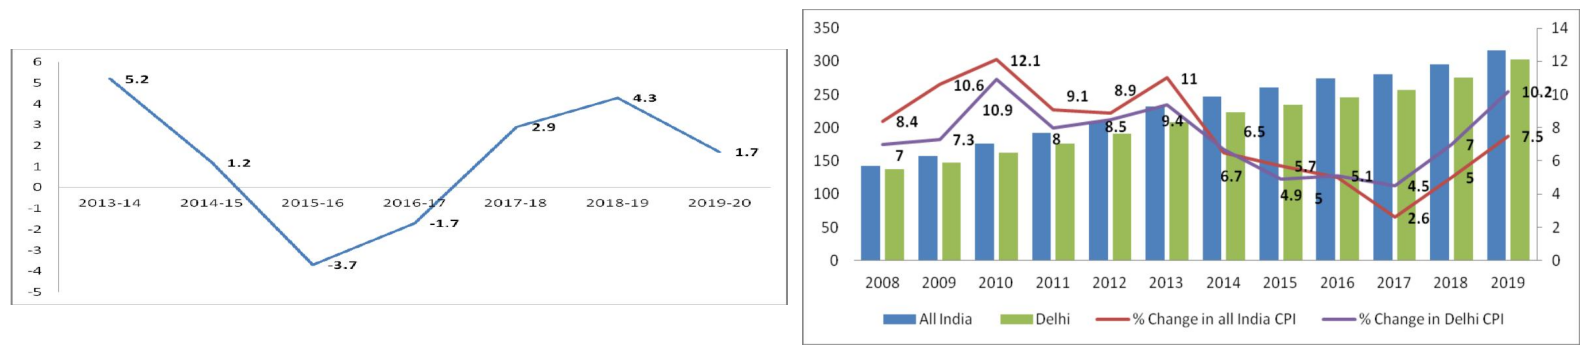

In [24]:
#image-to-text
import matplotlib.pyplot as plt

def show_images_from_payloads(results):
    plt.figure(figsize=(16, 6))
    for i, res in enumerate(results):
        # Check if 'file_path' exists in the payload before accessing it
        if 'file_path' in res.payload:
            img = Image.open(res.payload["file_path"])
            plt.subplot(1, len(results), i + 1)
            plt.imshow(img)
            plt.axis("off")
        else:
            print(f"Warning: Item {i} in results does not have 'file_path' in its payload.")
            # Optionally display some other information from the payload, like text
            if 'text' in res.payload:
                print(f"Payload text: {res.payload['text'][:100]}...")
            else:
                 print(f"Payload: {res.payload}")


    plt.tight_layout()
    plt.show()

# Perform a search on the clip_figures collection (image search)
query = "Show one graphs"
tokenized = clip.tokenize([query]).to(device)

with torch.no_grad():
    q_vector = model.encode_text(tokenized).cpu().numpy()[0]

image_search_results = client.search(
    collection_name="clip_figures",
    query_vector=q_vector,
    limit=3
)

# Now call the function with the results from the image search
show_images_from_payloads(image_search_results)

# The subsequent text search results from ipython-input-28 would still be available
# in the `results` variable if you needed to use them elsewhere, but they
# are not suitable for the show_images_from_payloads function.


In [25]:
#text-to-text retrieval
query = "what is CPI-W"

# Step 1: Encode with CLIP
query_tokens = clip.tokenize([query], truncate=True).to(device)
with torch.no_grad():
    query_vector = model.encode_text(query_tokens).cpu().numpy()[0]

# Step 2: Search in text collection
hits = client.search(
    collection_name="clip_texts",
    query_vector=query_vector,
    limit=5
)

# Step 3: Print results
for hit in hits:
    print("Score:", hit.score)
    print("Text:", hit.payload["text"])
    print("---")


Score: 0.8610005974769592
Text: Statement 6.2.
---
Score: 0.828260600566864
Text: in Table 6.1.
---
Score: 0.8063861727714539
Text: CHAPTER 6

PRICE TRENDS
---
Score: 0.8005063533782959
Text: II. Consumer Price Index number for Industrial Workers (CPI-IW)

III. Consumer Price Index number for Agricultural Laborers (CPI-AL)

IV. Consumer Price Index number for Rural Laborers (CPI-RL)
---
Score: 0.7939052581787109
Text: unauthorized prices are, however, not taken in the compilation of index numbers. In case of rationed commodities, the fair price is taken.
---


<ipython-input-25-3825910037>:10: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  hits = client.search(


In [26]:
def merge_chunks(chunks, max_len=500):
    merged = []
    current = ""

    for el in chunks:
        if hasattr(el, "text") and el.text.strip():
            txt = el.text.strip()
            if len(current) + len(txt) < max_len:
                current += " " + txt
            else:
                merged.append(current.strip())
                current = txt
    if current:
        merged.append(current.strip())
    return merged


In [27]:
merged_chunks = merge_chunks(chunks)

text_embeddings = []
text_metadata = []

for txt in merged_chunks:
    tokens = clip.tokenize([txt], truncate=True).to(device)
    with torch.no_grad():
        embedding = model.encode_text(tokens).cpu().numpy()[0]

    text_embeddings.append(embedding)
    text_metadata.append({
        "text": txt,
        "type": "text"
    })


In [28]:
#text-to-text retrieval
query = "what is CPI-W"

# Step 1: Encode with CLIP
query_tokens = clip.tokenize([query], truncate=True).to(device)
with torch.no_grad():
    query_vector = model.encode_text(query_tokens).cpu().numpy()[0]

# Step 2: Search in text collection
hits = client.search(
    collection_name="clip_texts",
    query_vector=query_vector,
    limit=5
)

# Step 3: Print results
for hit in hits:
    print("Score:", hit.score)
    print("Text:", hit.payload["text"])
    print("---")


Score: 0.8610005974769592
Text: Statement 6.2.
---
Score: 0.828260600566864
Text: in Table 6.1.
---
Score: 0.8063861727714539
Text: CHAPTER 6

PRICE TRENDS
---
Score: 0.8005063533782959
Text: II. Consumer Price Index number for Industrial Workers (CPI-IW)

III. Consumer Price Index number for Agricultural Laborers (CPI-AL)

IV. Consumer Price Index number for Rural Laborers (CPI-RL)
---
Score: 0.7939052581787109
Text: unauthorized prices are, however, not taken in the compilation of index numbers. In case of rationed commodities, the fair price is taken.
---


<ipython-input-28-3825910037>:10: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  hits = client.search(


In [29]:
print("Original chunks:", len([el for el in chunks if hasattr(el, "text") and el.text.strip()]))
print("Merged chunks:", len(merged_chunks))


Original chunks: 59
Merged chunks: 49


In [30]:
# Extract CLIP text embeddings for original chunks
original_text_embeddings = []
original_text_metadata = []

for el in chunks:
    if hasattr(el, "text") and el.text.strip():
        txt = el.text.strip()
        # Tokenize the text, allowing truncation
        text = clip.tokenize([txt], truncate=True).to(device)
        with torch.no_grad():
          #generate embeddings
            embedding = model.encode_text(text).cpu().numpy()[0]

        original_text_embeddings.append(embedding)
        original_text_metadata.append({
            "text": txt,
            "type": "text"
        })

# Create the old text collection if it doesn't exist or clear it
# Use a different collection name for the original chunks
client.recreate_collection(
    collection_name="clip_texts_old",
    vectors_config=VectorParams(size=512, distance=Distance.COSINE),
)

# Upload original text embeddings to Qdrant
client.upsert(
    collection_name="clip_texts_old",
    points=[
        PointStruct(id=i, vector=vec, payload=meta)
        for i, (vec, meta) in enumerate(zip(original_text_embeddings, original_text_metadata))
    ]
)

print(f"[📦] Qdrant clip_texts_old count:",
      client.count(collection_name="clip_texts_old").count)

# Now you can run the comparison code block
query = "What is CPI-W?"

# Step 1: Encode with CLIP (using the existing query vector)
# query_tokens = clip.tokenize([query], truncate=True).to(device)
# with torch.no_grad():
#     query_vector = model.encode_text(query_tokens).cpu().numpy()[0]
# Assuming query_vector from ipython-input-44 is still in scope.
# If not, uncomment the above lines to regenerate it.

# Run against old short chunks
hits_old = client.search(collection_name="clip_texts_old", query_vector=query_vector, limit=3) # Changed query_points to search

# Run against new merged chunks
hits_new = client.search(collection_name="clip_texts", query_vector=query_vector, limit=3) # Changed query_points to search

print("\n🧾 Results from old collection:")
for h in hits_old:
    print("-", h.payload["text"][:300], "...")

print("\n🆕 Results from merged collection:")
for h in hits_new:
    print("-", h.payload["text"][:300], "...")

<ipython-input-30-3133683353>:22: DeprecationWarning: `recreate_collection` method is deprecated and will be removed in the future. Use `collection_exists` to check collection existence and `create_collection` instead.
  client.recreate_collection(


[📦] Qdrant clip_texts_old count: 59

🧾 Results from old collection:
- Statement 6.2. ...
- in Table 6.1. ...
- CHAPTER 6

PRICE TRENDS ...

🆕 Results from merged collection:
- Statement 6.2. ...
- in Table 6.1. ...
- CHAPTER 6

PRICE TRENDS ...


<ipython-input-30-3133683353>:50: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  hits_old = client.search(collection_name="clip_texts_old", query_vector=query_vector, limit=3) # Changed query_points to search
<ipython-input-30-3133683353>:53: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  hits_new = client.search(collection_name="clip_texts", query_vector=query_vector, limit=3) # Changed query_points to search


In [31]:
query_text="What is CPI-W"

In [32]:
def multimodal_search(query_text):
    # encode query using CLIP text encoder
    query_tokens = clip.tokenize([query_text], truncate=True).to(device)
    with torch.no_grad():
        query_vector = model.encode_text(query_tokens).cpu().numpy()[0]

    # search texts
    text_hits = client.search("clip_texts", query_vector=query_vector, limit=3)

    # search images
    image_hits = client.search("clip_figures", query_vector=query_vector, limit=3)

    return text_hits, image_hits


In [33]:
##2nd method

In [34]:
#summarize text chunks
from openai import OpenAI
openai_client = OpenAI(api_key="sk-...........")

text_summaries = []
text_metadata = []

for el in chunks:
    if hasattr(el, "text") and el.text.strip():
        text = el.text.strip()

        response = openai_client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "Summarize this technical document section briefly and clearly."},
                {"role": "user", "content": text}
            ]
        )
        summary = response.choices[0].message.content
        text_summaries.append(summary)
        text_metadata.append({"text": summary, "type": "summary"})


In [35]:
#summarize figures with gpt
import base64
from PIL import Image
import io

def encode_image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

image_summaries = []
image_metadata = []

for fname in os.listdir(figures_dir):
    if fname.endswith(".jpg") or fname.endswith(".png"):
        path = os.path.join(figures_dir, fname)
        base64_image = encode_image_to_base64(path)

        response = openai_client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "Describe the figure in the image as if explaining it to a researcher."},
                {"role": "user", "content": [
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{base64_image}",
                            "detail": "high"
                        }
                    }
                ]}
            ]
        )

        summary = response.choices[0].message.content
        image_summaries.append(summary)
        image_metadata.append({
            "text": summary,
            "file_path": path,
            "type": "figure_summary"
        })


In [36]:
from openai import OpenAI

In [37]:
#Combine All Summaries → Store in Vector DB (Qdrant)
from openai import OpenAI
# ✅ Define embedding function
def get_openai_embedding(text):
    response = openai_client.embeddings.create(
        input=text,
        model="text-embedding-3-small"  # or "text-embedding-ada-002"
    )
    return response.data[0].embedding

# Embed and upload summaries
combined_summaries = text_metadata + image_metadata

client = QdrantClient(path="./qdrant_gpt_summaries")
client.recreate_collection(
    collection_name="gpt_summaries",
    vectors_config=VectorParams(size=1536, distance=Distance.COSINE),
)

client.upsert(
    collection_name="gpt_summaries",
    points=[
        PointStruct(
            id=i,
            vector=get_openai_embedding(d["text"]),
            payload=d
        ) for i, d in enumerate(combined_summaries)
    ]
)


<ipython-input-37-3235951497>:15: DeprecationWarning: `recreate_collection` method is deprecated and will be removed in the future. Use `collection_exists` to check collection existence and `create_collection` instead.
  client.recreate_collection(


UpdateResult(operation_id=0, status=<UpdateStatus.COMPLETED: 'completed'>)

In [38]:
#query answering
query = "what does the graph say?"

query_embedding = get_openai_embedding(query)

results = client.query_points(
    collection_name="gpt_summaries",
    query=query_embedding,
    limit=5,
    with_payload=True
)

for hit in results.points:
    print(f"Score: {hit.score:.3f}\nSummary: {hit.payload['text']}\n---")


Score: 0.475
Summary: The image depicts a line graph illustrating a trend over a range of years from 2013-14 to 2019-20. 

### Key Features:
- The **Y-axis** represents values that seem to range approximately from -5 to 6.
- The **X-axis** labels the years: 2013-14, 2014-15, 2015-16, 2016-17, 2017-18, 2018-19, and 2019-20.

### Data Points:
- In **2013-14**, the value is **5.2**, which is the highest point on the graph.
- In **2014-15**, there is a significant drop to **1.2**.
- From **2014-15** to **2015-16**, the value decreases further to **-3.7**, indicating a declining trend.
- In **2016-17**, the graph shows a slight recovery to **-1.7**.
- A marked increase occurs in **2017-18**, reaching **2.9**.
- The graph peaks again in **2018-19** at **4.3** before dropping to **1.7** in **2019-20**.

### Overall Trend:
The graph illustrates fluctuations, with a notable peak in 2013-14 followed by a decline, a slight recovery, and a final peak in 2018-19 before the last recorded dip in 2019

In [39]:
#query answering- only texts
query = "what does the first graph say?"

query_embedding = get_openai_embedding(query)

results = client.query_points(
    collection_name="gpt_summaries",
    query=query_embedding,
    limit=5,
    with_payload=True
)

for hit in results.points:
    print(f"Score: {hit.score:.3f}\nSummary: {hit.payload['text']}\n---")

Score: 0.395
Summary: The image depicts a line graph illustrating a trend over a range of years from 2013-14 to 2019-20. 

### Key Features:
- The **Y-axis** represents values that seem to range approximately from -5 to 6.
- The **X-axis** labels the years: 2013-14, 2014-15, 2015-16, 2016-17, 2017-18, 2018-19, and 2019-20.

### Data Points:
- In **2013-14**, the value is **5.2**, which is the highest point on the graph.
- In **2014-15**, there is a significant drop to **1.2**.
- From **2014-15** to **2015-16**, the value decreases further to **-3.7**, indicating a declining trend.
- In **2016-17**, the graph shows a slight recovery to **-1.7**.
- A marked increase occurs in **2017-18**, reaching **2.9**.
- The graph peaks again in **2018-19** at **4.3** before dropping to **1.7** in **2019-20**.

### Overall Trend:
The graph illustrates fluctuations, with a notable peak in 2013-14 followed by a decline, a slight recovery, and a final peak in 2018-19 before the last recorded dip in 2019

In [40]:
#query answering texts with images
import matplotlib.pyplot as plt
from PIL import Image
import IPython.display as display
import os # Import os

query = "What does the price trend chart say about CPI-AL?"
query_embedding = get_openai_embedding(query)

results = client.query_points(
    collection_name="gpt_summaries",
    query=query_embedding,
    limit=3,
    with_payload=True
)

# Iterate through results.points instead of results
for hit in results.points:
    print("🔍 Score:", hit.score)

    payload = hit.payload
    # Use .get() with a default value for robustness
    summary = payload.get("text", "[No summary]") # The key in the payload is 'text', not 'summary' based on the upsert call
    file_path = payload.get("file_path", None)

    print("📄 Summary:", summary)

    if file_path and os.path.exists(file_path):
        print("🖼️ Showing image:", file_path)
        try:
            image = Image.open(file_path)
            plt.imshow(image)
            plt.axis("off")
            plt.show()
        except Exception as e:
            print(f"❌ Error displaying image {file_path}: {e}")
    else:
        print("❌ No image found or path invalid.")

    print("-" * 60)


🔍 Score: 0.5687170652498457
📄 Summary: This section outlines the Consumer Price Index (CPI) statistics for different labor groups. It includes the CPI for Industrial Workers (CPI-IW), Agricultural Laborers (CPI-AL), and Rural Laborers (CPI-RL). Each index measures the average change over time in the prices paid by these specific worker categories for a basket of consumer goods and services, reflecting inflation and cost of living impacts on their economic conditions.
❌ No image found or path invalid.
------------------------------------------------------------
🔍 Score: 0.553295117493021
📄 Summary: Section 4.4 presents a graphical representation of the Consumer Price Index (CPI) for industrial workers in Delhi and across India from 2008 to 2019. The chart illustrates the CPI trends, with an indication of percentage changes over the years, using a new series with a base year of 2016 set to 100.
❌ No image found or path invalid.
------------------------------------------------------------

In [41]:
#only describe the images
query_vector = get_openai_embedding(query)

results = client.search(
    collection_name="gpt_summaries",
    query_vector=query_vector,
    limit=3,
    with_payload=True
)

for result in results:
    payload = result.payload
    print("📝 Summary:", payload["text"])

    # Check if 'file_path' exists in the payload
    if "file_path" in payload:
        file_path = payload["file_path"]
        print("🖼️ Image Path:", file_path)
        try:
            # Use IPython.display.Image only if file_path is present
            from IPython.display import Image, display
            display(Image(filename=file_path))
        except Exception as e:
             print(f"❌ Error displaying image {file_path}: {e}")
    else:
        # Handle cases where the result is a text summary and has no image
        print("📄 Result is a text summary, no image path.")

    print("-" * 20) # Add a separator for clarity between results

📝 Summary: This section outlines the Consumer Price Index (CPI) statistics for different labor groups. It includes the CPI for Industrial Workers (CPI-IW), Agricultural Laborers (CPI-AL), and Rural Laborers (CPI-RL). Each index measures the average change over time in the prices paid by these specific worker categories for a basket of consumer goods and services, reflecting inflation and cost of living impacts on their economic conditions.
📄 Result is a text summary, no image path.
--------------------
📝 Summary: Section 4.4 presents a graphical representation of the Consumer Price Index (CPI) for industrial workers in Delhi and across India from 2008 to 2019. The chart illustrates the CPI trends, with an indication of percentage changes over the years, using a new series with a base year of 2016 set to 100.
📄 Result is a text summary, no image path.
--------------------
📝 Summary: The annual average consumer price index (CPI) rose from 275 in 2018 to 303 in 2019, an increase of 28 poi

<ipython-input-41-1137708404>:4: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  results = client.search(


In [42]:
!pip install fastapi uvicorn pyngrok qdrant-client openai nest_asyncio


In [43]:
from pyngrok import ngrok

# Paste your ngrok authtoken here (only needs to be done once)
ngrok.set_auth_token("2y...........")


In [44]:
from IPython import get_ipython
from qdrant_client import QdrantClient # Make sure QdrantClient is imported

# Get the current IPython instance
ipython = get_ipython()

# Check if the 'client' variable exists and is a QdrantClient instance
if 'client' in ipython.user_ns and isinstance(ipython.user_ns['client'], QdrantClient):
    print("Closing existing Qdrant client...")
    try:
        ipython.user_ns['client'].close()
        print("Client closed successfully.")
    except Exception as e:
        print(f"Error closing client: {e}")
    # It's good practice to remove the variable from the namespace as well
    del ipython.user_ns['client']
else:
    print("No active Qdrant client found in the namespace.")

Closing existing Qdrant client...
Client closed successfully.


In [45]:
import nest_asyncio
import uvicorn
from fastapi import FastAPI, Request
from pydantic import BaseModel
from qdrant_client import QdrantClient
from qdrant_client.models import Distance, VectorParams, PointStruct
from openai import OpenAI
from pyngrok import ngrok

# Setup
nest_asyncio.apply()

# Init FastAPI app
app = FastAPI()

# Init Qdrant (in-memory)
client = QdrantClient(path="./qdrant_gpt_summaries")
collection_name = "gpt_summaries"


# Init OpenAI client (replace with your key)
openai_client = OpenAI(api_key="sk-...........")

# Store texts in memory
text_store = []

# Pydantic model
class QueryRequest(BaseModel):
    query: str

@app.post("/query")
async def query_rag(req: QueryRequest):
    query_text = req.query
    response = openai_client.embeddings.create(
        input=query_text,
        model="text-embedding-3-small"
    )
    query_vector = response.data[0].embedding

    search_results = client.search(
        collection_name=collection_name,
        query_vector=query_vector,
        limit=2
    )

    return {
        "query": query_text,
        "results": [hit.payload for hit in search_results]
    }

@app.post("/ingest")
async def ingest_doc(data: dict):
    text = data["text"]
    file_path = data.get("file_path")
    source = data.get("source")

    embedding = openai_client.embeddings.create(
        input=text,
        model="text-embedding-3-small"
    ).data[0].embedding

    payload = {"text": text}
    if file_path:
        payload["file_path"] = file_path
    if source:
        payload["source"] = source

    client.upsert(
        collection_name=collection_name,
        points=[PointStruct(id=len(text_store), vector=embedding, payload=payload)]
    )
    text_store.append(text)
    return {"status": "ingested", "text": text}

# ngrok tunnel
public_url = ngrok.connect(8000)
print("✅ Public URL:", public_url)

# Write ngrok URL to file (for Streamlit frontend)
with open("ngrok_url.txt", "w") as f:
    f.write(str(public_url))

# Allow nested async loop in Colab
nest_asyncio.apply()

# Run app
uvicorn.run(app, host="0.0.0.0", port=8000)

✅ Public URL: NgrokTunnel: "https://e8b9-34-16-158-206.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [311]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     117.238.99.141:0 - "POST /query HTTP/1.1" 200 OK


<ipython-input-45-3295450879>:40: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  search_results = client.search(


INFO:     117.238.99.141:0 - "POST /query HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [311]
